In [158]:
import warnings
warnings.filterwarnings('ignore')

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
lead=pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [161]:
lead.shape

(9240, 37)

In [162]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [163]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [164]:
sum(lead.duplicated(subset='Prospect ID'))

0

In [165]:
sum(lead.duplicated(subset = 'Lead Number'))

0

In [166]:
#dropping lead variables and prospect id 
lead.drop(['Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Prospect ID'],axis = 1,inplace = True)

In [167]:
lead.shape

(9240, 29)

We observed in the head of data that some columns have a entry called select.These ory actually null values as for that particular column the customer would have been given options of categories to select from and he would not have selected any category. Hence we will look into columns that have string Select in it and then we will replace it with NaN.

In [168]:
lead.columns[lead.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'City'], dtype='object')

In [169]:
#replace select with nan
lead=lead.replace('Select', np.nan)

In [170]:
lead.columns[lead.isin(['Select']).any()]

Index([], dtype='object')

Looking for null values in the data frame 

In [171]:
lead.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [172]:
#null percentage
round(100*(lead.isnull().sum()/len(lead.index)), 2)


Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

We can see it from the above info that there is only one column with null vales greater than 40 percent. We will drop that column.

In [173]:

lead.drop(['How did you hear about X Education'],inplace=True,axis=1)

In [174]:
lead.shape

(9240, 28)

In [175]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 non-null object
What is your current occupation                  6550 

# Now we will look into details of each column one by one 

In [176]:
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [177]:
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

Here we haeve 36 Nan values. We will replace them with the most frequent category i,e 'Google'

In [178]:
lead['Lead Source']=lead['Lead Source'].replace(np.nan,"Google")

In [179]:
lead['Lead Source'].value_counts(dropna=False)

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [180]:
round(100*(lead['Lead Source'].value_counts(normalize = True)),2)

Google               31.43
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Social Media          0.02
Press_Release         0.02
Live Chat             0.02
WeLearn               0.01
youtubechannel        0.01
welearnblog_Home      0.01
Pay per Click Ads     0.01
NC_EDM                0.01
testone               0.01
blog                  0.01
Name: Lead Source, dtype: float64

There are too many categories in lead score column and many of the categories have very less value counts. Hence we will combine all these categories with low counts into a single category.

In [181]:
lead['Lead Source'] = lead['Lead Source'].replace(['Reference',
                                                           'Welingak Website',
                                                           'Referral Sites',
                                                           'Facebook',
                                                           'bing',
                                                           'google',
                                                           'Click2call',
                                                           'Social Media',
                                                           'Live Chat',
                                                            'Press_Release',
                                                            'NC_EDM',
                                                            'Pay per Click Ads',
                                                            'testone',
                                                             'blog',
                                                             'youtubechannel',
                                                             'welearnblog_Home',
                                                              'WeLearn'] ,'Other Source')

In [182]:
round(100*(lead['Lead Source'].value_counts(normalize = True)),2)

Google            31.43
Direct Traffic    27.52
Olark Chat        18.99
Organic Search    12.49
Other Source       9.57
Name: Lead Source, dtype: float64

In [183]:
lead['Do Not Email'].value_counts(dropna=False,normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

This column has only 2 categories and they are highly skewed hence we will drop this column 

In [184]:
lead.drop(['Do Not Email'],inplace=True,axis=1)

In [185]:
lead['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

This column has only 2 categories and they are highly skewed hence we will drop this column 

In [186]:
lead.drop(['Do Not Call'],inplace=True,axis=1)

In [187]:
lead['Converted'].value_counts(dropna=False)

0    5679
1    3561
Name: Converted, dtype: int64

In [188]:
lead['TotalVisits'].isnull().sum()

137

In [189]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

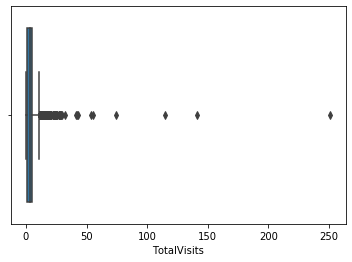

In [190]:
sns.boxplot(x=lead["TotalVisits"])

Here we can see that there are outliers. We will replace these outliers with median value that is 3.

In [191]:
lead['TotalVisits']=lead['TotalVisits'].replace(np.nan,3)

In [192]:
lead['TotalVisits'].isnull().sum()

0

In [193]:
lead['Page Views Per Visit'].isnull().sum()

137

In [194]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

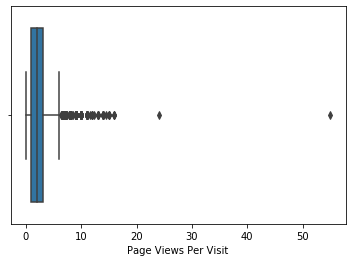

In [195]:
sns.boxplot(x=lead["Page Views Per Visit"])

Here we can see that there are outliers. We will replace these outliers with median value that is 2.

In [196]:
lead["Page Views Per Visit"]= lead["Page Views Per Visit"].replace(np.nan,2)

In [197]:
lead['Page Views Per Visit'].isnull().sum()

0

In [198]:
lead['Last Activity'].isnull().sum()

103

In [199]:
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

 Since we have Nan values and this is a categorical variable, so we will replace with the mode i.e Email Opened

In [200]:
#replacing with the maximum categorical value 
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Email Opened')

In [201]:
lead['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [202]:
lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Marked Spam               0.000216
Email Received                  0.000216
Resubscribed to emails          0.000108
Visited Booth in Tradeshow      0.000108
Name: Last Activity, dtype: float64

There are too many categories in last activity column and many of the categories have very less value counts. Hence we will combine all these categories with low counts into a single category.

In [203]:
lead['Last Activity']=lead['Last Activity'].replace(['Page Visited on Website','Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsbscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails','Unsubscribed'],'other activity')

In [204]:
lead['Last Activity'].value_counts(normalize=True)

Email Opened               0.383117
SMS Sent                   0.297078
other activity             0.214502
Olark Chat Conversation    0.105303
Name: Last Activity, dtype: float64

In [205]:
lead['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Kuwait                     4
Nigeria                    4
Canada                     4
South Africa               4
Sweden                     3
Ghana                      2
Asia/Pacific Region        2
China                      2
Italy                      2
Netherlands                2
Uganda                     2
Belgium                    2
Philippines                2
Bangladesh                 2
Vietnam                    1
Russia                     1
Malaysia                   1
Kenya                      1
Switzerland                1
Denmark       

Here we can observe that we have countries with very less count so even if we will group them into a single category and will replace Nan with India(since in categorical varibale we replace the Nan with the Mode) we will get a huge difference in the percentage. Our data will be highly skewed. So we will drop the column Country.

In [206]:
lead.drop(['Country'],axis=1, inplace=True)

In [207]:
lead['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Here nan is in large numbers hence we cannot replace it with mode. we will turn it into a new category as maybe the specialization of these people is not known.

In [208]:

lead['Specialization'] = lead['Specialization'].replace(np.nan, 'unknown')

There are many specialization with managment in it so lets look into it for some possible trends

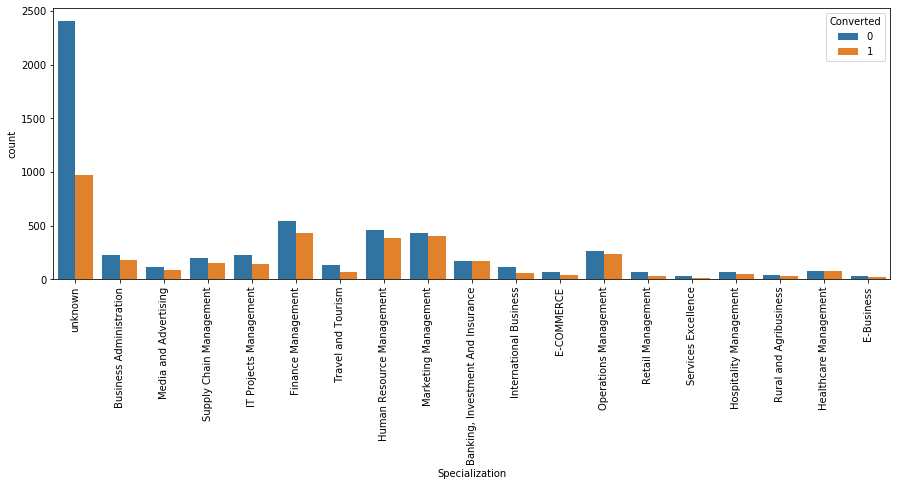

In [209]:
 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Specialization, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Combining Management Specializations because they show similar trends

In [210]:
lead['Specialization'] = lead['Specialization'].replace(['Finance Management',
                                                           'Human Resource Management',
                                                           'Marketing Management',
                                                           'Operations Management',
                                                           'IT Projects Management',
                                                           'Supply Chain Management',
                                                           'Healthcare Management',
                                                           'Hospitality Management',
                                                           'Retail Management'] ,'Management')

In [211]:
#visualizing count of Variable based on Converted value
lead['Specialization'].value_counts(dropna = False)

Management                           4253
unknown                              3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [212]:
lead['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

the number of nan values is sgnificantly high so we will make it a seperate category as Not specified and we will combine Student others housewife and bussinessan as a new category others as they have very low count.

In [213]:

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Not Specified')
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Student',
                                                                                           'Other',
                                                                                           'Housewife',
                                                                                           'Businessman'],'Others')

In [214]:
lead['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Nan's can be replaced by Better career aspects and once we will do that data will be highly skewed so we will drop this column.


In [215]:
lead.drop(['What matters most to you in choosing a course'], axis = 1,inplace = True)

In [216]:
lead['Search'].value_counts(dropna = False)

No     9226
Yes      14
Name: Search, dtype: int64

Higly skewed data we can drop it

In [217]:

lead.drop(['Search'],axis = 1,inplace = True)

In [218]:
lead['Magazine'].value_counts(dropna = False)

No    9240
Name: Magazine, dtype: int64

Since all the values in this columns are no, this column is not useful. Hence we will drop it.

In [219]:
lead.drop(['Magazine'],axis = 1, inplace = True)

In [220]:
lead['Newspaper Article'].value_counts(dropna = False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

Higly skewed data we can drop it

In [221]:
lead.drop(['Newspaper Article'],axis = 1, inplace = True)

In [222]:
lead['X Education Forums'].value_counts(dropna = False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

Higly skewed data we can drop it

In [223]:
lead.drop(['X Education Forums'],axis = 1, inplace = True)

In [224]:
lead['Newspaper'].value_counts(dropna = False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

Higly skewed data we can drop it

In [225]:
lead.drop(['Newspaper'],axis = 1, inplace = True)

In [226]:
lead['Digital Advertisement'].value_counts(dropna = False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

Higly skewed data we can drop it

In [227]:
lead.drop(['Digital Advertisement'],axis = 1, inplace = True)

In [228]:
lead['Through Recommendations'].value_counts(dropna = False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Higly skewed data we can drop it

In [229]:
lead.drop(['Through Recommendations'],axis = 1, inplace = True)

In [230]:
lead['Receive More Updates About Our Courses'].value_counts(dropna = False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

Since all the values in this column are no this column is not useful. Hence we will drop it.

In [231]:
lead.drop(['Receive More Updates About Our Courses'],axis = 1, inplace = True)

In [232]:
lead['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

Since all the values in this column are no this column is not useful. Hence we will drop it.

In [233]:
lead.drop(['Update me on Supply Chain Content'],axis = 1, inplace = True)

In [234]:
lead['Get updates on DM Content'].value_counts(dropna = False)

No    9240
Name: Get updates on DM Content, dtype: int64

Since all the values in this caloumns are no thsi column is not useful. Hence we will drop it.

In [235]:
lead.drop(['Get updates on DM Content'],axis = 1, inplace = True)

In [236]:
lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Here we will replace Nan values with Mumbai as it is the most common category.
we will merge Thane and outskirts with other cities if maharashtra as these are low in numbers and are similar categories
And then we will merge tire II cities and other cities in as one category as they are also very low in  numbers.

In [237]:
lead['City'] = lead['City'].replace(np.nan,'City unspecified')
lead['City'] = lead['City'].replace(['Thane & Outskirts','Other Cities of Maharashtra'],'Other Cities of Maharashtra')
lead['City'] = lead['City'].replace(['Tier II Cities','Other Cities'],'Other Cities')
lead['City'].value_counts(dropna = False)

City unspecified               3669
Mumbai                         3222
Other Cities of Maharashtra    1209
Other Cities                    760
Other Metro Cities              380
Name: City, dtype: int64

In [238]:
lead['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

Since all the values in this column are no this column is not useful. Hence we will drop it.

In [239]:
lead.drop(['I agree to pay the amount through cheque'],axis = 1, inplace = True)

In [240]:
lead['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

This is a binary categorical variable. We will replace NO with 0 and Yes with 1

In [241]:
lead['A free copy of Mastering The Interview']=lead['A free copy of Mastering The Interview'].replace({'No':0,'Yes':1})

In [242]:
lead['A free copy of Mastering The Interview'].value_counts(dropna=True)

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [243]:
lead['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

We will replace the categories from page Visited on Website to Approached upfron with a single category named other Notable activity as these categories are very low in numbers.

In [244]:
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Page Visited on Website',
                                                                        'Olark Chat Conversation',
                                                                        'Email Link Clicked',
                                                                        'Email Bounced',
                                                                        'Unsubscribed',
                                                                        'Unreachable',
                                                                        'Had a Phone Conversation',
                                                                        'Email Marked Spam',
                                                                         'View in browser link Clicked',
                                                                          'Resubscribed to emails',
                                                                         'Email Received',
                                                                          'Form Submitted on Website',
                                                                          'Approached upfront'],'Other_Notable_activity')

In [245]:
lead['Last Notable Activity'].value_counts(dropna = False)

Modified                  3407
Email Opened              2827
SMS Sent                  2172
Other_Notable_activity     834
Name: Last Notable Activity, dtype: int64

In [246]:
#remaing data frame 
lead.shape

(9240, 13)

In [247]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null int64
Last Notable Activity                     9240 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 938.6+ KB


# Numerical variable analysis (outlier Treatment)

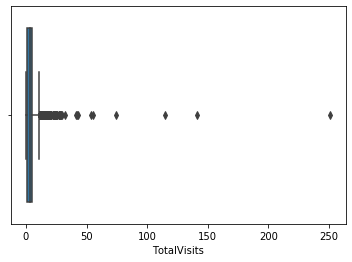

In [248]:
sns.boxplot(x=lead["TotalVisits"])
plt.show()

We will cap these outliers

In [249]:
q1=lead['TotalVisits'].quantile(0.95)
lead['TotalVisits'][lead['TotalVisits']>=q1]=q1

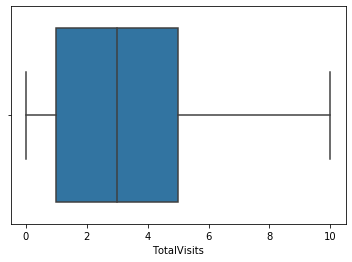

In [250]:
sns.boxplot(x=lead["TotalVisits"])
plt.show()

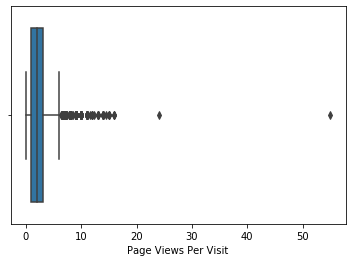

In [251]:
sns.boxplot(x=lead["Page Views Per Visit"])
plt.show()

we will cap the outliers

In [252]:
q1=lead['Page Views Per Visit'].quantile(0.95)
lead['Page Views Per Visit'][lead['Page Views Per Visit']>=q1]=q1

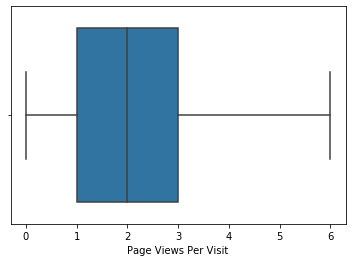

In [253]:
sns.boxplot(x=lead['Page Views Per Visit'])
plt.show()

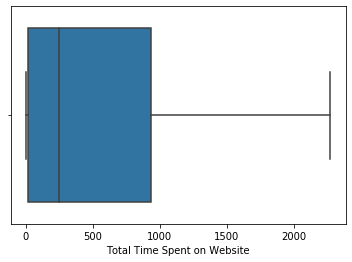

In [254]:
sns.boxplot(x=lead["Total Time Spent on Website"])
plt.show()

There are not outliers

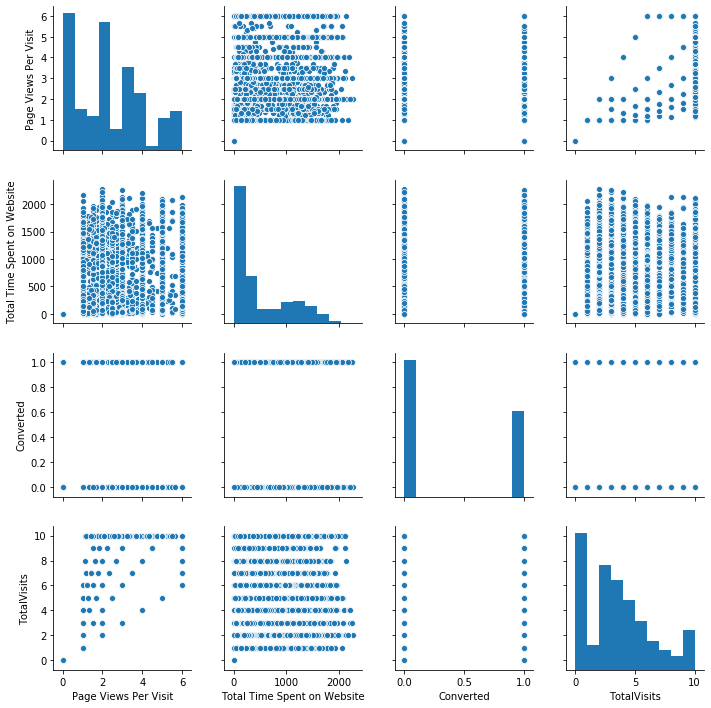

In [255]:
sns.pairplot(lead,vars =['Page Views Per Visit','Total Time Spent on Website','Converted','TotalVisits'] )
plt.show()

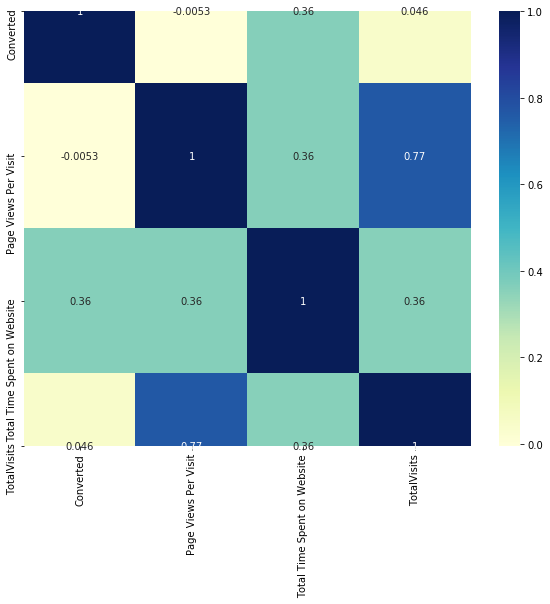

In [256]:
plt.figure(figsize=(10,8))
sns.heatmap(lead[['Converted','Page Views Per Visit','Total Time Spent on Website','TotalVisits']].corr(), cmap="YlGnBu", annot=True)
plt.show()

Total visits and and page views per visits have high corelation 

## Categorical variable(visulatization)

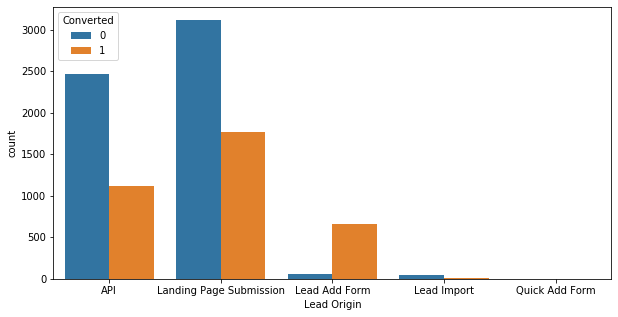

In [257]:
plt.figure(figsize=(10,5))
sns.countplot(data = lead ,x= 'Lead Origin', hue = 'Converted')

- Lead add form has high conversion rate. 
- API and Landing page submission have poor conversion rate

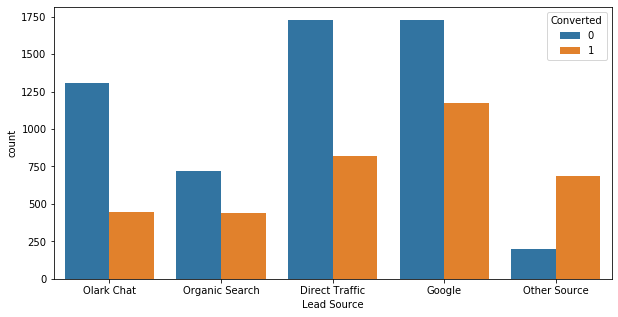

In [258]:
plt.figure(figsize=(10,5))
sns.countplot(data = lead ,x= 'Lead Source', hue = 'Converted')

- Other sources have high conversion rate
- Leads from Olark Chat have a very low conversion rate

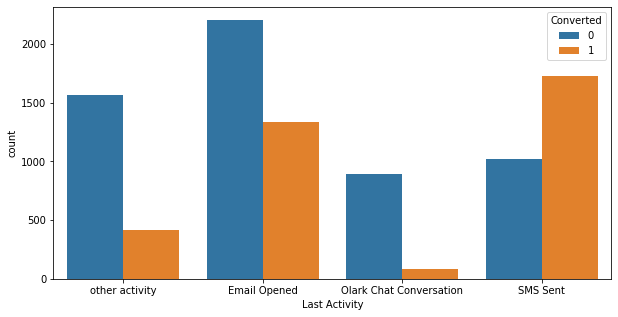

In [259]:
plt.figure(figsize=(10,5))
sns.countplot(data = lead ,x= 'Last Activity', hue = 'Converted')
plt.show()

- The ones with last activity as Olark chat conversation and other activity have a very low conversion rate.
- The ones with last activity as SMS Sent have a very good conversion rate.

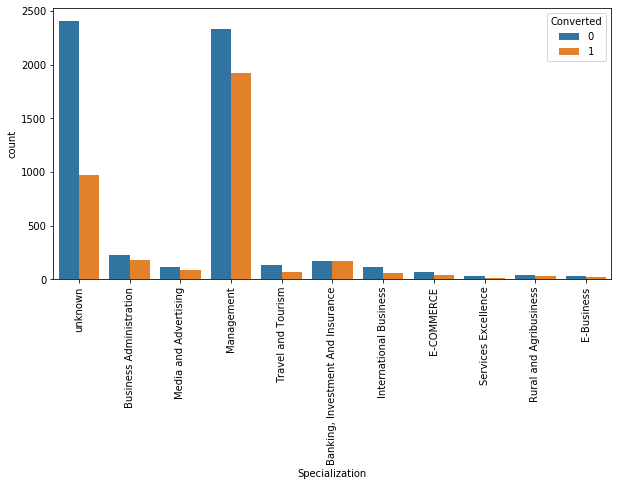

In [260]:
plt.figure(figsize=(10,5))
sns.countplot(data = lead ,x= 'Specialization', hue = 'Converted')
plt.xticks(rotation=90) 
plt.show()

- The ones that have not provided with their Specialization have a very poor conversion rate.
- People Specialized in banking, Investment, insurance and managment have a decent conversion rate

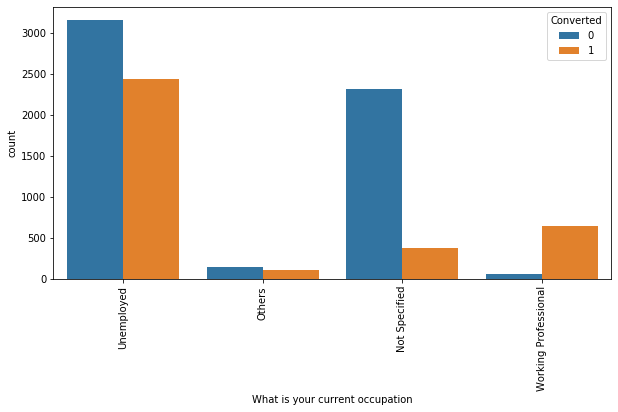

In [261]:
plt.figure(figsize=(10,5))
sns.countplot(data = lead ,x= 'What is your current occupation', hue = 'Converted')
plt.xticks(rotation=90) 
plt.show()

- Working professionals have a very good conversion rate 
- The people who have not specified their profession have a poor conversion rate.

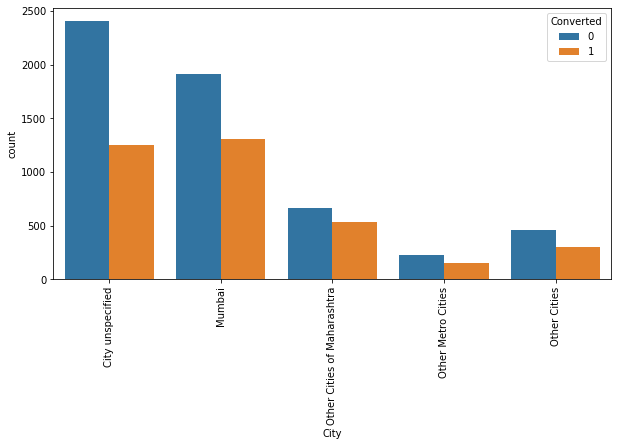

In [262]:
plt.figure(figsize=(10,5))
sns.countplot(data = lead ,x= 'City', hue = 'Converted')
plt.xticks(rotation=90) 
plt.show()

- People with un specified cities have poor conversion rate.

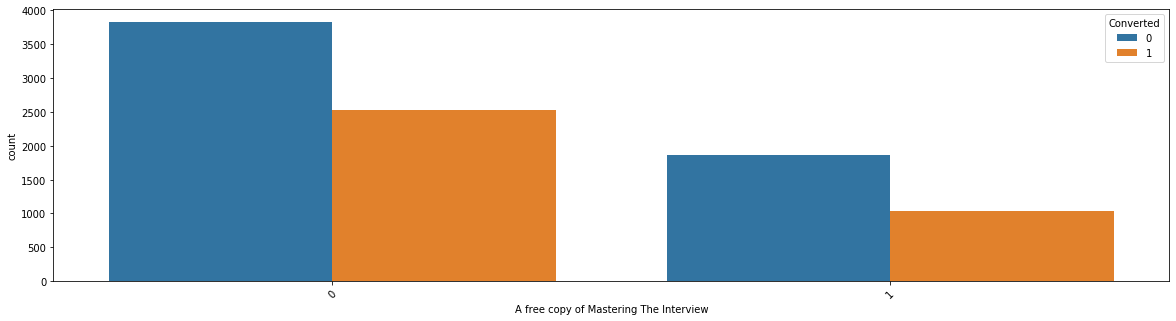

In [263]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45) 
sns.countplot(data = lead ,x= 'A free copy of Mastering The Interview', hue = 'Converted')

- Nothing much can be infered from this category

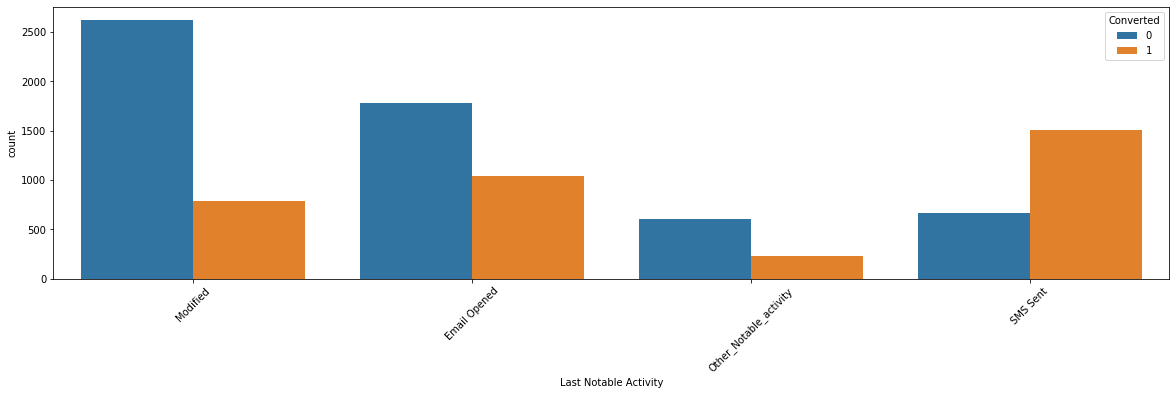

In [264]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45) 
sns.countplot(data = lead ,x= 'Last Notable Activity', hue = 'Converted')

- People with last notable activity as SMS sent have a very high conversion rate 
- Modified has a very poor conversion rate.

# Data Prepration 

Creating Dummies 

In [265]:
lo = pd.get_dummies(lead['Lead Origin'], prefix = 'lo')
lo1 = lo.drop(['lo_Quick Add Form'], 1)
lead = pd.concat([lead,lo1],1)

ls = pd.get_dummies(lead['Lead Source'],prefix = 'ls',drop_first=True)
lead = pd.concat([lead,ls],1)

la=pd.get_dummies(lead['Last Activity'],prefix= 'la')
la1=la.drop(['la_Olark Chat Conversation'],1)
lead=pd.concat([lead,la1],1)

sp=pd.get_dummies(lead['Specialization'],prefix= 'sp')
sp1=sp.drop(['sp_Services Excellence'],1)
lead=pd.concat([lead,sp1],1)

ln = pd.get_dummies(lead['Last Notable Activity'], prefix = 'ln')
ln1=ln.drop(['ln_Other_Notable_activity'],1)
lead=pd.concat([lead,ln1],1)

ct = pd.get_dummies(lead['City'],prefix = 'ct')
ct1 = ct.drop(['ct_Other Metro Cities'],1)
lead=pd.concat([lead,ct1],1)

co=pd.get_dummies(lead['What is your current occupation'],prefix= 'co')
co1=co.drop(['co_Others'],1)
lead=pd.concat([lead,co1],1)

In [266]:
lead.shape

(9240, 44)

In [267]:
# We have created dummies for the below variables, so we can drop them
lead.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City','Last Notable Activity'],axis = 1, inplace = True)
lead.shape

(9240, 37)

In [268]:
lead.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Lead Number                               9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
A free copy of Mastering The Interview    9240 non-null int64
lo_API                                    9240 non-null uint8
lo_Landing Page Submission                9240 non-null uint8
lo_Lead Add Form                          9240 non-null uint8
lo_Lead Import                            9240 non-null uint8
ls_Google                                 9240 non-null uint8
ls_Olark Chat                             9240 non-null uint8
ls_Organic Search                         9240 non-null uint8
ls_Other Source                           9240 non-null uint8
la_Email Opened      

Here we can see that all variables are numeric so we can procede further

### Test-Train Split

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
#putting feature variable to X
X=lead.drop(['Converted','Lead Number'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lo_API,lo_Landing Page Submission,lo_Lead Add Form,lo_Lead Import,ls_Google,ls_Olark Chat,...,ln_Email Opened,ln_Modified,ln_SMS Sent,ct_City unspecified,ct_Mumbai,ct_Other Cities,ct_Other Cities of Maharashtra,co_Not Specified,co_Unemployed,co_Working Professional
0,0.0,0,0.0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5.0,674,2.5,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,2.0,1532,2.0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,2.0,1428,1.0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0


In [271]:
# Putting response variable to y
Y=lead['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [272]:
#Splitting data into test train split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)

## Feature Sclaing

In [273]:
from sklearn.preprocessing import StandardScaler

In [274]:
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lo_API,lo_Landing Page Submission,lo_Lead Add Form,lo_Lead Import,ls_Google,ls_Olark Chat,...,ln_Email Opened,ln_Modified,ln_SMS Sent,ct_City unspecified,ct_Mumbai,ct_Other Cities,ct_Other Cities of Maharashtra,co_Not Specified,co_Unemployed,co_Working Professional
1871,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
6795,0.299722,0.005716,-0.516439,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3516,0.662077,-0.691418,0.143543,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
8105,0.662077,1.365219,1.553761,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3934,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [275]:
#checking the conversion rate 
conversion_rate = (sum(lead['Converted'])/len(lead['Converted']))*100
conversion_rate

38.53896103896104

conversion rate is approx 38 %

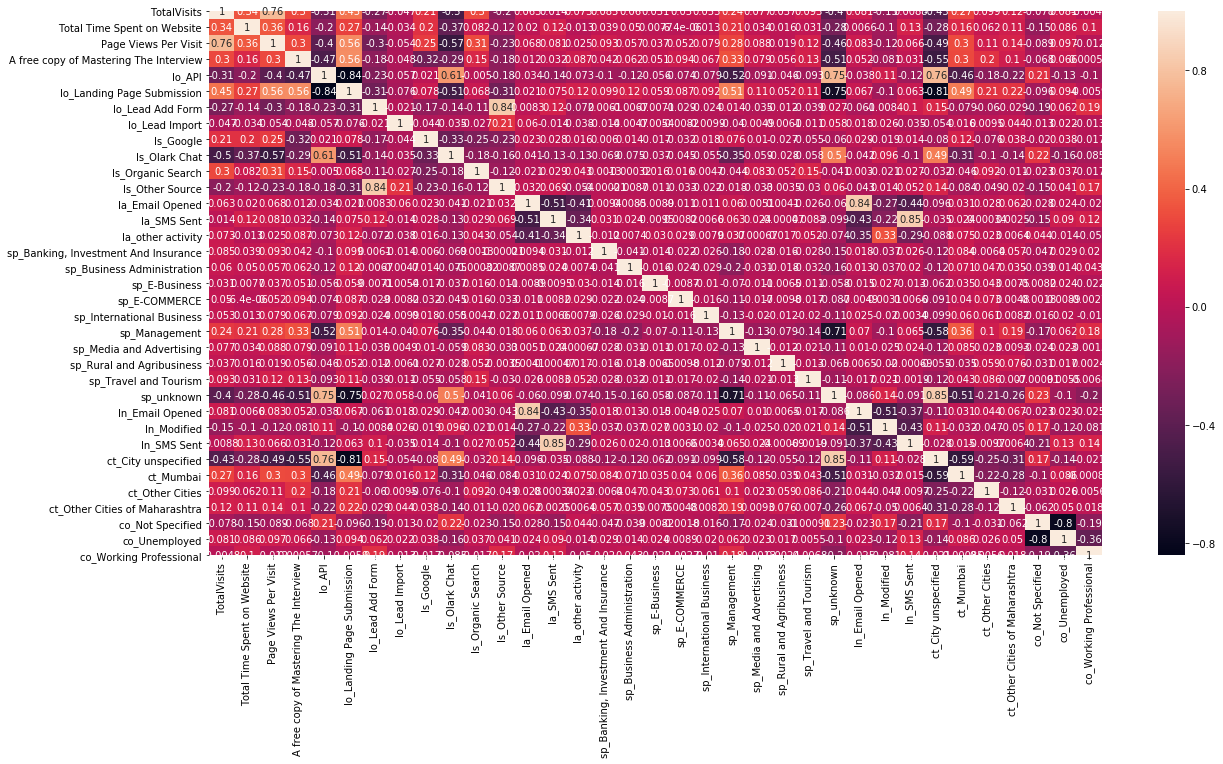

In [276]:
#checking for corelations
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## Model building

In [277]:
import statsmodels.api as sm

In [278]:
# Feature selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [279]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, Y_train)

In [280]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True])

In [281]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('lo_API', True, 1),
 ('lo_Landing Page Submission', True, 1),
 ('lo_Lead Add Form', True, 1),
 ('lo_Lead Import', True, 1),
 ('ls_Google', False, 6),
 ('ls_Olark Chat', True, 1),
 ('ls_Organic Search', False, 9),
 ('ls_Other Source', False, 3),
 ('la_Email Opened', True, 1),
 ('la_SMS Sent', True, 1),
 ('la_other activity', False, 2),
 ('sp_Banking, Investment And Insurance', False, 10),
 ('sp_Business Administration', False, 8),
 ('sp_E-Business', False, 7),
 ('sp_E-COMMERCE', False, 4),
 ('sp_International Business', True, 1),
 ('sp_Management', False, 16),
 ('sp_Media and Advertising', False, 11),
 ('sp_Rural and Agribusiness', True, 1),
 ('sp_Travel and Tourism', False, 12),
 ('sp_unknown', True, 1),
 ('ln_Email Opened', True, 1),
 ('ln_Modified', True, 1),
 ('ln_SMS Sent', True, 1),
 ('ct_City unspecified', True, 1),
 ('c

In [282]:
col = X_train.columns[rfe.support_]

In [283]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'lo_API',
       'lo_Landing Page Submission', 'lo_Lead Add Form', 'lo_Lead Import',
       'ls_Olark Chat', 'la_Email Opened', 'la_SMS Sent',
       'sp_International Business', 'sp_Rural and Agribusiness', 'sp_unknown',
       'ln_Email Opened', 'ln_Modified', 'ln_SMS Sent', 'ct_City unspecified',
       'co_Not Specified', 'co_Working Professional'],
      dtype='object')

In [284]:
X_train.columns[~rfe.support_]

Index(['ls_Google', 'ls_Organic Search', 'ls_Other Source',
       'la_other activity', 'sp_Banking, Investment And Insurance',
       'sp_Business Administration', 'sp_E-Business', 'sp_E-COMMERCE',
       'sp_Management', 'sp_Media and Advertising', 'sp_Travel and Tourism',
       'ct_Mumbai', 'ct_Other Cities', 'ct_Other Cities of Maharashtra',
       'co_Unemployed'],
      dtype='object')

In [285]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.2
Date:                Mon, 07 Sep 2020   Deviance:                       5172.4
Time:                        17:00:04   Pearson chi2:                 7.12e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     17.9770   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
TotalVisits                                0.3357      0.054      6.212      0.000       0.230       0.442
Total Time Spent on Website                1.0586      0.040     26.270      0.000       0.980       1.138
Page Views Per Visit                      -0.3321      0.061     -5.477      0.000      -0.451      -0.213
A free copy of Mastering The Interview    -0.3898      0.090     -4.321      0.000      -0.567      -0.213
lo_API                                   -18.2575   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
lo_Landing Page Submission               -19.3057   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
lo_Lead Add Form                         -15.1771   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
lo_Lead Import                           -19.1352   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
ls_Olark Chat                              0.9538      0.141      6.774      0.000       0.678       1.230
la_Email Opened                            0.9693      0.162      5.975      0.000       0.651       1.287
la_SMS Sent                                1.5414      0.167      9.227      0.000       1.214       1.869
sp_International Business                 -0.3751      0.260     -1.445      0.148      -0.884       0.134
sp_Rural and Agribusiness                  0.4660      0.397      1.173      0.241      -0.313       1.244
sp_unknown                                -0.6683      0.162     -4.129      0.000      -0.986      -0.351
ln_Email Opened                           -0.4616      0.211     -2.189      0.029      -0.875      -0.048
ln_Modified                               -0.7930      0.156     -5.073      0.000      -1.099      -0.487
ln_SMS Sent                                0.2465      0.217      1.135      0.256      -0.179       0.672
ct_City unspecified                       -0.5668      0.175     -3.242      0.001      -0.910      -0.224
co_Not Specified                          -1.0042      0.089    -11.301      0.000      -1.178      -0.830
co_Working Professional                    2.4926      0.193     12.939      0.000       2.115       2.870
==========================================================================================================
"""

In [286]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,lo_API,11.25
14,ln_Email Opened,10.15
17,ct_City unspecified,9.12
5,lo_Landing Page Submission,8.85
16,ln_SMS Sent,8.78
13,sp_unknown,7.33
9,la_Email Opened,7.07
10,la_SMS Sent,6.29
15,ln_Modified,5.98
2,Page Views Per Visit,3.20


We will drop lo_API as it has high p-value and hence it is not significant

In [287]:
col = col.drop('lo_API',1)

In [288]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.3
Date:                Mon, 07 Sep 2020   Deviance:                       5172.5
Time:                        17:00:05   Pearson chi2:                 7.13e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2790      0.189     -1.478      0.139      -0.649       0.091
TotalVisits                                0.3357      0.054      6.211      0.000       0.230       0.442
Total Time Spent on Website                1.0590      0.040     26.288      0.000       0.980       1.138
Page Views Per Visit                      -0.3322      0.061     -5.479      0.000      -0.451      -0.213
A free copy of Mastering The Interview    -0.3900      0.090     -4.324      0.000      -0.567      -0.213
lo_Landing Page Submission                -1.0497      0.146     -7.182      0.000      -1.336      -0.763
lo_Lead Add Form                           3.0800      0.206     14.945      0.000       2.676       3.484
lo_Lead Import                            -0.8788      0.539     -1.632      0.103      -1.934       0.177
ls_Olark Chat                              0.9536      0.141      6.772      0.000       0.678       1.230
la_Email Opened                            0.9684      0.162      5.970      0.000       0.650       1.286
la_SMS Sent                                1.5407      0.167      9.224      0.000       1.213       1.868
sp_International Business                 -0.3753      0.260     -1.446      0.148      -0.884       0.133
sp_Rural and Agribusiness                  0.4659      0.397      1.173      0.241      -0.313       1.244
sp_unknown                                -0.6688      0.162     -4.132      0.000      -0.986      -0.352
ln_Email Opened                           -0.4608      0.211     -2.186      0.029      -0.874      -0.048
ln_Modified                               -0.7923      0.156     -5.069      0.000      -1.099      -0.486
ln_SMS Sent                                0.2473      0.217      1.139      0.255      -0.178       0.673
ct_City unspecified                       -0.5678      0.175     -3.248      0.001      -0.911      -0.225
co_Not Specified                          -1.0043      0.089    -11.303      0.000      -1.178      -0.830
co_Working Professional                    2.4924      0.193     12.938      0.000       2.115       2.870
==========================================================================================================
"""

In [289]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,ln_Email Opened,8.57
16,ct_City unspecified,7.91
15,ln_SMS Sent,7.55
8,la_Email Opened,7.06
12,sp_unknown,7.00
9,la_SMS Sent,6.29
4,lo_Landing Page Submission,5.28
14,ln_Modified,4.14
2,Page Views Per Visit,3.19
7,ls_Olark Chat,2.59


we will drop ln_SMS sent as it has very high p-value and hence is insignificant

In [290]:
col = col.drop('ln_SMS Sent',1)

In [291]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.9
Date:                Mon, 07 Sep 2020   Deviance:                       5173.8
Time:                        17:00:06   Pearson chi2:                 7.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1954      0.173     -1.127      0.260      -0.535       0.144
TotalVisits                                0.3266      0.053      6.114      0.000       0.222       0.431
Total Time Spent on Website                1.0586      0.040     26.284      0.000       0.980       1.138
Page Views Per Visit                      -0.3274      0.060     -5.416      0.000      -0.446      -0.209
A free copy of Mastering The Interview    -0.3893      0.090     -4.319      0.000      -0.566      -0.213
lo_Landing Page Submission                -1.0521      0.146     -7.196      0.000      -1.339      -0.766
lo_Lead Add Form                           3.0642      0.205     14.918      0.000       2.662       3.467
lo_Lead Import                            -0.9034      0.538     -1.680      0.093      -1.958       0.151
ls_Olark Chat                              0.9506      0.141      6.752      0.000       0.675       1.227
la_Email Opened                            1.0199      0.156      6.521      0.000       0.713       1.326
la_SMS Sent                                1.6863      0.108     15.686      0.000       1.476       1.897
sp_International Business                 -0.3731      0.260     -1.437      0.151      -0.882       0.136
sp_Rural and Agribusiness                  0.4572      0.396      1.154      0.249      -0.320       1.234
sp_unknown                                -0.6677      0.162     -4.122      0.000      -0.985      -0.350
ln_Email Opened                           -0.5899      0.178     -3.323      0.001      -0.938      -0.242
ln_Modified                               -0.9210      0.108     -8.545      0.000      -1.132      -0.710
ct_City unspecified                       -0.5711      0.175     -3.266      0.001      -0.914      -0.228
co_Not Specified                          -1.0147      0.088    -11.483      0.000      -1.188      -0.842
co_Working Professional                    2.4962      0.193     12.947      0.000       2.118       2.874
==========================================================================================================
"""

In [292]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,ct_City unspecified,7.73
13,ln_Email Opened,7.39
12,sp_unknown,6.92
8,la_Email Opened,6.80
4,lo_Landing Page Submission,4.62
2,Page Views Per Visit,3.18
14,ln_Modified,2.71
7,ls_Olark Chat,2.56
0,TotalVisits,2.52
9,la_SMS Sent,2.34


We will drop sp_Rural and Agribusiness as it has a high p-value.

In [293]:
col = col.drop('sp_Rural and Agribusiness',1)

In [294]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.6
Date:                Mon, 07 Sep 2020   Deviance:                       5175.2
Time:                        17:00:06   Pearson chi2:                 7.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1877      0.173     -1.084      0.278      -0.527       0.152
TotalVisits                                0.3275      0.053      6.136      0.000       0.223       0.432
Total Time Spent on Website                1.0581      0.040     26.277      0.000       0.979       1.137
Page Views Per Visit                      -0.3285      0.060     -5.437      0.000      -0.447      -0.210
A free copy of Mastering The Interview    -0.3867      0.090     -4.291      0.000      -0.563      -0.210
lo_Landing Page Submission                -1.0531      0.146     -7.205      0.000      -1.340      -0.767
lo_Lead Add Form                           3.0637      0.205     14.917      0.000       2.661       3.466
lo_Lead Import                            -0.9051      0.538     -1.683      0.092      -1.959       0.149
ls_Olark Chat                              0.9513      0.141      6.758      0.000       0.675       1.227
la_Email Opened                            1.0195      0.156      6.520      0.000       0.713       1.326
la_SMS Sent                                1.6836      0.107     15.665      0.000       1.473       1.894
sp_International Business                 -0.3787      0.260     -1.459      0.145      -0.887       0.130
sp_unknown                                -0.6734      0.162     -4.163      0.000      -0.990      -0.356
ln_Email Opened                           -0.5909      0.178     -3.329      0.001      -0.939      -0.243
ln_Modified                               -0.9224      0.108     -8.558      0.000      -1.134      -0.711
ct_City unspecified                       -0.5713      0.175     -3.269      0.001      -0.914      -0.229
co_Not Specified                          -1.0162      0.088    -11.504      0.000      -1.189      -0.843
co_Working Professional                    2.4925      0.193     12.934      0.000       2.115       2.870
==========================================================================================================
"""

we will dop sp_INternational Business as it has high p-value and hence it is insignificant

In [295]:
col = col.drop('sp_International Business',1)

In [296]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.7
Date:                Mon, 07 Sep 2020   Deviance:                       5177.3
Time:                        17:00:07   Pearson chi2:                 7.14e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2033      0.173     -1.177      0.239      -0.542       0.135
TotalVisits                                0.3288      0.053      6.163      0.000       0.224       0.433
Total Time Spent on Website                1.0591      0.040     26.302      0.000       0.980       1.138
Page Views Per Visit                      -0.3312      0.060     -5.483      0.000      -0.450      -0.213
A free copy of Mastering The Interview    -0.3877      0.090     -4.305      0.000      -0.564      -0.211
lo_Landing Page Submission                -1.0491      0.146     -7.184      0.000      -1.335      -0.763
lo_Lead Add Form                           3.0642      0.205     14.920      0.000       2.662       3.467
lo_Lead Import                            -0.8999      0.538     -1.673      0.094      -1.954       0.154
ls_Olark Chat                              0.9515      0.141      6.759      0.000       0.676       1.227
la_Email Opened                            1.0224      0.156      6.538      0.000       0.716       1.329
la_SMS Sent                                1.6844      0.107     15.669      0.000       1.474       1.895
sp_unknown                                -0.6639      0.162     -4.109      0.000      -0.981      -0.347
ln_Email Opened                           -0.5930      0.178     -3.340      0.001      -0.941      -0.245
ln_Modified                               -0.9202      0.108     -8.538      0.000      -1.131      -0.709
ct_City unspecified                       -0.5673      0.175     -3.249      0.001      -0.910      -0.225
co_Not Specified                          -1.0170      0.088    -11.513      0.000      -1.190      -0.844
co_Working Professional                    2.4973      0.193     12.959      0.000       2.120       2.875
==========================================================================================================
"""

In [297]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,ct_City unspecified,7.72
11,ln_Email Opened,7.38
10,sp_unknown,6.90
8,la_Email Opened,6.80
4,lo_Landing Page Submission,4.60
2,Page Views Per Visit,3.18
12,ln_Modified,2.70
7,ls_Olark Chat,2.55
0,TotalVisits,2.52
9,la_SMS Sent,2.34


We will drop lo_lead Import as it has high p-value and hence is insignificnat 

In [298]:
col = col.drop('lo_Lead Import',1)

In [299]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.2
Date:                Mon, 07 Sep 2020   Deviance:                       5180.4
Time:                        17:00:07   Pearson chi2:                 7.15e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2586      0.169     -1.527      0.127      -0.591       0.073
TotalVisits                                0.3329      0.053      6.245      0.000       0.228       0.437
Total Time Spent on Website                1.0631      0.040     26.433      0.000       0.984       1.142
Page Views Per Visit                      -0.3244      0.060     -5.384      0.000      -0.443      -0.206
A free copy of Mastering The Interview    -0.3820      0.090     -4.242      0.000      -0.558      -0.205
lo_Landing Page Submission                -0.9976      0.143     -6.999      0.000      -1.277      -0.718
lo_Lead Add Form                           3.1098      0.204     15.266      0.000       2.711       3.509
ls_Olark Chat                              0.9907      0.139      7.127      0.000       0.718       1.263
la_Email Opened                            1.0026      0.156      6.426      0.000       0.697       1.308
la_SMS Sent                                1.6768      0.107     15.620      0.000       1.466       1.887
sp_unknown                                -0.7027      0.160     -4.403      0.000      -1.016      -0.390
ln_Email Opened                           -0.5795      0.177     -3.269      0.001      -0.927      -0.232
ln_Modified                               -0.9243      0.108     -8.582      0.000      -1.135      -0.713
ct_City unspecified                       -0.4858      0.167     -2.902      0.004      -0.814      -0.158
co_Not Specified                          -1.0162      0.088    -11.503      0.000      -1.189      -0.843
co_Working Professional                    2.4932      0.193     12.930      0.000       2.115       2.871
==========================================================================================================
"""

In [300]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,ln_Email Opened,7.38
12,ct_City unspecified,7.37
7,la_Email Opened,6.74
9,sp_unknown,6.67
4,lo_Landing Page Submission,4.56
2,Page Views Per Visit,3.16
11,ln_Modified,2.68
6,ls_Olark Chat,2.53
0,TotalVisits,2.52
8,la_SMS Sent,2.30


all our p-values are low but ln_Email_opened has high vif. Hence we will drop it 

In [301]:
col = col.drop('ln_Email Opened',1)

In [302]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.5
Date:                Mon, 07 Sep 2020   Deviance:                       5191.0
Time:                        17:00:08   Pearson chi2:                 7.04e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3831      0.166     -2.315      0.021      -0.707      -0.059
TotalVisits                                0.3437      0.053      6.461      0.000       0.239       0.448
Total Time Spent on Website                1.0661      0.040     26.533      0.000       0.987       1.145
Page Views Per Visit                      -0.3272      0.060     -5.440      0.000      -0.445      -0.209
A free copy of Mastering The Interview    -0.3879      0.090     -4.317      0.000      -0.564      -0.212
lo_Landing Page Submission                -1.0004      0.143     -7.019      0.000      -1.280      -0.721
lo_Lead Add Form                           3.1469      0.203     15.486      0.000       2.749       3.545
ls_Olark Chat                              1.0079      0.139      7.258      0.000       0.736       1.280
la_Email Opened                            0.6093      0.101      6.017      0.000       0.411       0.808
la_SMS Sent                                1.7626      0.104     16.874      0.000       1.558       1.967
sp_unknown                                -0.6848      0.159     -4.300      0.000      -0.997      -0.373
ln_Modified                               -0.7187      0.087     -8.243      0.000      -0.890      -0.548
ct_City unspecified                       -0.5006      0.167     -2.994      0.003      -0.828      -0.173
co_Not Specified                          -1.0327      0.088    -11.716      0.000      -1.205      -0.860
co_Working Professional                    2.5009      0.193     12.971      0.000       2.123       2.879
==========================================================================================================
"""

In [303]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,ct_City unspecified,7.26
9,sp_unknown,6.66
4,lo_Landing Page Submission,4.20
2,Page Views Per Visit,3.16
0,TotalVisits,2.52
6,ls_Olark Chat,2.52
7,la_Email Opened,2.24
8,la_SMS Sent,2.22
3,A free copy of Mastering The Interview,2.18
10,ln_Modified,1.87


we will drop ct_city unspecified as it has high vif

In [304]:
col = col.drop('ct_City unspecified',1)

In [305]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.9
Date:                Mon, 07 Sep 2020   Deviance:                       5199.9
Time:                        17:00:09   Pearson chi2:                 7.13e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.5620      0.154     -3.655      0.000      -0.863      -0.261
TotalVisits                                0.3507      0.053      6.610      0.000       0.247       0.455
Total Time Spent on Website                1.0665      0.040     26.575      0.000       0.988       1.145
Page Views Per Visit                      -0.3311      0.060     -5.507      0.000      -0.449      -0.213
A free copy of Mastering The Interview    -0.3626      0.089     -4.059      0.000      -0.538      -0.188
lo_Landing Page Submission                -0.8498      0.133     -6.392      0.000      -1.110      -0.589
lo_Lead Add Form                           3.1600      0.203     15.544      0.000       2.762       3.558
ls_Olark Chat                              0.9950      0.139      7.180      0.000       0.723       1.267
la_Email Opened                            0.6313      0.101      6.260      0.000       0.434       0.829
la_SMS Sent                                1.7627      0.104     16.884      0.000       1.558       1.967
sp_unknown                                -0.9833      0.126     -7.807      0.000      -1.230      -0.736
ln_Modified                               -0.7084      0.087     -8.138      0.000      -0.879      -0.538
co_Not Specified                          -1.0392      0.088    -11.807      0.000      -1.212      -0.867
co_Working Professional                    2.4786      0.194     12.803      0.000       2.099       2.858
==========================================================================================================
"""

In [306]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,lo_Landing Page Submission,4.10
2,Page Views Per Visit,3.16
9,sp_unknown,2.72
0,TotalVisits,2.52
6,ls_Olark Chat,2.47
7,la_Email Opened,2.21
3,A free copy of Mastering The Interview,2.17
8,la_SMS Sent,2.13
10,ln_Modified,1.84
5,lo_Lead Add Form,1.62


Now our VIF values and p-values are all under control. Hence this will be our final model

In [307]:
#predicting values on Ytrain 
Y_train_pred=res.predict(X_train_sm)
Y_train_pred.head()

1871    0.534005
6795    0.136542
3516    0.384182
8105    0.821220
3934    0.174298
dtype: float64

In [308]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.53400528, 0.13654235, 0.38418199, 0.82121985, 0.17429769,
       0.99308594, 0.15848962, 0.98391033, 0.06355421, 0.91985755])

In [309]:
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_prob':Y_train_pred})
Y_train_pred_final['Prospect ID'] = Y_train.index
Y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.534005,1871
1,0,0.136542,6795
2,0,0.384182,3516
3,0,0.821220,8105
4,0,0.174298,3934


leststake cut off to be 0.5 for now. conversion_prob above 0.5 will be treated as 1 and others as 0

In [310]:

Y_train_pred_final['Predicted'] = Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.534005,1871,1
1,0,0.136542,6795,0
2,0,0.384182,3516,0
3,0,0.821220,8105,1
4,0,0.174298,3934,0


In [311]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
print(confusion)

[[3567  435]
 [ 714 1752]]


In [312]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.8223562152133581


In [313]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [314]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7104622871046229

In [315]:
# Let us calculate specificity
TN / float(TN+FP)

0.8913043478260869

In [316]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10869565217391304


In [317]:
# positive predictive value 
print (TP / float(TP+FP))

0.8010973936899863


In [318]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8332165381920112


plotting ROC curve

In [319]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [320]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob, drop_intermediate = False )

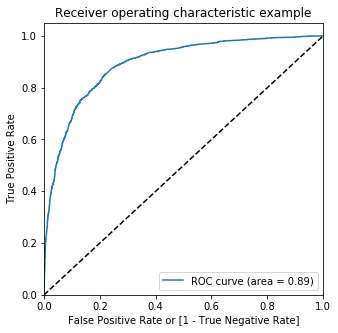

In [321]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

In [322]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.534005,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.136542,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.384182,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.821220,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.174298,3934,0,1,1,0,0,0,0,0,0,0,0


In [323]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.625541  0.970397  0.413043
0.2   0.2  0.765461  0.915247  0.673163
0.3   0.3  0.802257  0.874696  0.757621
0.4   0.4  0.816945  0.771695  0.844828
0.5   0.5  0.822356  0.710462  0.891304
0.6   0.6  0.805659  0.614355  0.923538
0.7   0.7  0.791126  0.538524  0.946777
0.8   0.8  0.763760  0.436334  0.965517
0.9   0.9  0.723408  0.296431  0.986507


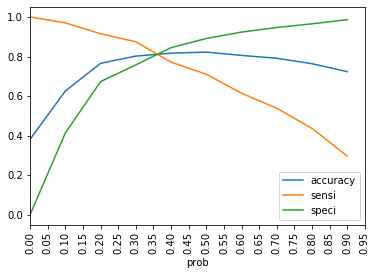

In [324]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05),rotation=(90))
plt.show()

In [325]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

Y_train_pred_final['final_Predicted'] = Y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

Y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.534005,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.136542,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.384182,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.821220,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.174298,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [326]:
Y_train_pred_final['Lead_Score'] = Y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

Y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.534005,1871,1,53
1,0,0.136542,6795,0,14
2,0,0.384182,3516,1,38
3,0,0.821220,8105,1,82
4,0,0.174298,3934,0,17


In [327]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted)

0.8104514533085961

In [328]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted )
confusion2

array([[3251,  751],
       [ 475, 1991]], dtype=int64)

In [329]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [330]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8073803730738037

In [331]:
# Let us calculate specificity
TN / float(TN+FP)

0.8123438280859571

In [332]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.187656171914043


In [333]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7261123267687819


In [334]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8725174449812131


In [335]:
from sklearn.metrics import precision_score, recall_score

In [336]:
precision_score(Y_train_pred_final.Converted , Y_train_pred_final.final_Predicted)

0.7261123267687819

In [337]:
recall_score(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted)

0.8073803730738037

In [338]:
from sklearn.metrics import precision_recall_curve

In [339]:
Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_prob)

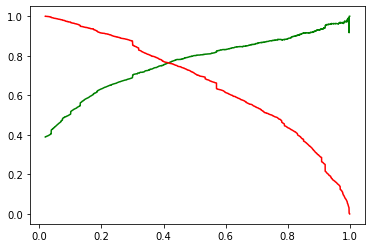

In [340]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The above graph suggests a optimal cut off of 0.4 for having the best trade off between precision and recall. But in this assignment we are using sensitivity and specificty as our evaluation parameters so we will go with 0.35. 

# Making predictions on test set

In [341]:
#scaling test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lo_API,lo_Landing Page Submission,lo_Lead Add Form,lo_Lead Import,ls_Google,ls_Olark Chat,...,ln_Email Opened,ln_Modified,ln_SMS Sent,ct_City unspecified,ct_Mumbai,ct_Other Cities,ct_Other Cities of Maharashtra,co_Not Specified,co_Unemployed,co_Working Professional
4269,1.749143,0.964504,2.117849,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2376,-1.149699,-0.885371,-1.266675,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
7766,0.662077,-0.777416,1.553761,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
9199,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4359,-1.149699,-0.885371,-1.266675,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [342]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,lo_Landing Page Submission,lo_Lead Add Form,ls_Olark Chat,la_Email Opened,la_SMS Sent,sp_unknown,ln_Modified,co_Not Specified,co_Working Professional
4269,1.749143,0.964504,2.117849,0,0,0,0,0,1,1,0,1,0
2376,-1.149699,-0.885371,-1.266675,0,0,1,0,0,1,1,0,0,0
7766,0.662077,-0.777416,1.553761,0,0,0,0,0,0,0,0,0,1
9199,-1.149699,-0.885371,-1.266675,0,0,0,1,0,0,1,1,0,0
4359,-1.149699,-0.885371,-1.266675,0,0,1,0,1,0,0,0,0,0


In [343]:
X_test_sm = sm.add_constant(X_test)

In [344]:
Y_test_pred = res.predict(X_test_sm)

In [345]:
Y_test_pred[:10]

4269    0.529705
2376    0.920511
7766    0.691097
9199    0.100949
4359    0.908979
9186    0.564382
1631    0.492441
8963    0.228274
8007    0.026723
5324    0.390791
dtype: float64

In [346]:
# Converting y_pred to a dataframe which is an array
Y_pred_1 = pd.DataFrame(Y_test_pred)

In [347]:
# Let's see the head
Y_pred_1.head()

,0
4269,0.529705
2376,0.920511
7766,0.691097
9199,0.100949
4359,0.908979


In [348]:
# Converting y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [349]:
# Putting Prospect_ID to index
Y_test_df['Prospect ID'] = Y_test_df.index

In [350]:
# Removing index for both dataframes to append them side by side 
Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [351]:
# Appending y_test_df and y_pred_1
Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)
Y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.529705
1,1,2376,0.920511
2,1,7766,0.691097
3,0,9199,0.100949
4,1,4359,0.908979


In [352]:
# Renaming the column 
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Converted_prob'})
Y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.529705
1,1,2376,0.920511
2,1,7766,0.691097
3,0,9199,0.100949
4,1,4359,0.908979


In [353]:
# Rearranging the columns
Y_pred_final = Y_pred_final[['Prospect ID','Converted','Converted_prob']]
Y_pred_final['Lead_Score'] = Y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [354]:
Y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.529705,53
1,2376,1,0.920511,92
2,7766,1,0.691097,69
3,9199,0,0.100949,10
4,4359,1,0.908979,91


In [355]:
Y_pred_final['final_Predicted'] = Y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
Y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.529705,53,1
1,2376,1,0.920511,92,1
2,7766,1,0.691097,69,1
3,9199,0,0.100949,10,0
4,4359,1,0.908979,91,1


In [356]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_Predicted)

0.8113275613275613

In [357]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_Predicted )
confusion2

array([[1369,  308],
       [ 215,  880]], dtype=int64)

In [358]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [359]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8036529680365296

In [360]:
# Let us calculate specificity
TN / float(TN+FP)

0.8163387000596303

In [361]:
precision_score(Y_pred_final.Converted , Y_pred_final.final_Predicted)

0.7407407407407407

In [362]:
recall_score(Y_pred_final.Converted, Y_pred_final.final_Predicted)

0.8036529680365296

# Conclusion

- Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 81.04%
Sensitivity : 80.7%
Specificity : 81.2%
Test Data: 
Accuracy : 81.1%
Sensitivity : 80.3%
Specificity : 81.6%

- We got a good sensitivity and specificity score for our model in both test and train set. Also the scores are very close for test and train. Hence our model is doing good.
- The value of precision and recall is also good.
- The model will help CEO of Xeducation to make good predictions and increase their conversion rate.

-The final model has following variables that influence the predictions:
- TotalVisits
- Total Time Spent on Website
-    Page Views Per Visit
-    A free copy of Mastering The Interview
-    lo_Landing Page Submission
-    lo_Lead Add Form
-   ls_Olark Chat
-    la_Email Opened
-    la_SMS Sent
-    sp_unknown
-    ln_Modified
-    co_Not Specified
-    co_Working Professional


# Recommendation

There are certain traits of customers that make then more likely to be converted to lead. They are as follows:
-	As many working professionals as possible should be called.
-	All the customers with lead origin as lead add form should be called.
-	Customers who spend more time on Website should be called.
-	Customers with last activity as SMS sent should be contacted as much as possible.
-	Customers as lead source as Olark chat should be called.
